1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [1]:
from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer(as_frame=True)
my_data_df = my_data.frame
X = my_data_df.drop(['target'],axis=1)
print(X)
print("--------------------------------")
y = my_data_df["target"]
print(y)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

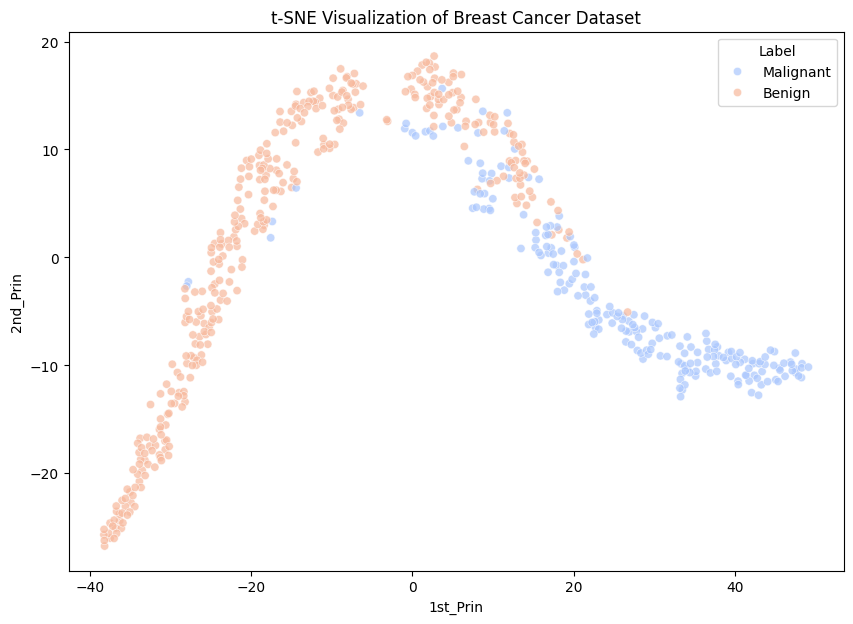

In [2]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(X)

tsne_df = pd.DataFrame(tsne_data, columns=['1st_Prin', '2nd_Prin'])
tsne_df['Label'] = y

label_mapping = {0: 'Malignant', 1: 'Benign'}
tsne_df['Label'] = tsne_df['Label'].map(label_mapping)

plt.figure(figsize=(10, 7))

sns.scatterplot(x='1st_Prin', y='2nd_Prin', hue='Label', palette='coolwarm', data=tsne_df, alpha=0.7)

plt.title('t-SNE Visualization of Breast Cancer Dataset')

plt.xlabel('1st_Prin')
plt.ylabel('2nd_Prin')

plt.legend(title='Label', loc='best')
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [61]:
from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(...)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
Y_train shape: (455,)
Y_test shape: (114,)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


model_decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=3
)
decison_tree_params = {
                        "Criterion":model_decision_tree.criterion,
                        "Max Depth":model_decision_tree.max_depth,
                        "Min Samples Split": model_decision_tree.min_samples_split,

                    }

model_decision_tree.fit(X_train, Y_train)
y_pred = model_decision_tree.predict(X_test)

Y_train_pred = model_decision_tree.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

print(f"Decision tree model trained.\nTraining accuracy: {train_accuracy:.4f}\nDecision Tree Params: {decison_tree_params}")

Decision tree model trained.
Training accuracy: 0.9978
Decision Tree Params: {'Criterion': 'gini', 'Max Depth': 6, 'Min Samples Split': 3}


5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


model_random_forest = RandomForestClassifier(
    n_estimators=25,
    max_depth=9,
    min_samples_split=3,
    criterion='entropy',
    bootstrap=True
)
forest_params = {
                        "Criterion": model_random_forest.criterion,
                        "n estimators":model_random_forest.n_estimators,
                        "Max Depth": model_random_forest.max_depth,
                        "Min Samples Split": model_random_forest.min_samples_split,
                        "Min Samples Leaf": model_random_forest.min_samples_leaf
                    }

model_random_forest.fit(X_train, Y_train)

Y_train_pred = model_random_forest.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)
model_random_forest.fit(X_train, Y_train)
Y_test_pred = model_random_forest.predict(X_test)



print(f"Random forest model trained.\nTraining accuracy: {train_accuracy:.4f}\nRandom Forest Params: {forest_params}")

Random forest model trained.
Training accuracy: 0.9978
Random Forest Params: {'Criterion': 'entropy', 'n estimators': 25, 'Max Depth': 9, 'Min Samples Split': 3, 'Min Samples Leaf': 1}


6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [120]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


model_adaboost = AdaBoostClassifier(
    n_estimators=10,
    learning_rate=1.1
)
adaboost_params = {
                        "n estimators":model_adaboost.n_estimators,
                        "Learning Rate": model_adaboost.learning_rate,
                    }

model_adaboost.fit(X_train, Y_train)

Y_train_pred = model_adaboost.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

print(f"AdaBoost model trained.\nTraining Accuracy: {train_accuracy:.4f}\nRandom Forest Params: {adaboost_params}")


AdaBoost model trained.
Training Accuracy: 0.9824
Random Forest Params: {'n estimators': 10, 'Learning Rate': 1.1}


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Y_test_pred_tree = model_decision_tree.predict(X_test)
accuracy_tree = accuracy_score(Y_test, Y_test_pred_tree)
precision_tree = precision_score(Y_test, Y_test_pred_tree, average='weighted')
recall_tree = recall_score(Y_test, Y_test_pred_tree, average='weighted')
cm_tree = confusion_matrix(Y_test, Y_test_pred_tree)
f1_tree = f1_score(Y_test, Y_test_pred_tree, average='weighted')


Y_test_pred_forest = model_random_forest.predict(X_test)
accuracy_forest = accuracy_score(Y_test, Y_test_pred_forest)
precision_forest = precision_score(Y_test, Y_test_pred_forest, average='weighted')
recall_forest = recall_score(Y_test, Y_test_pred_forest, average='weighted')
cm_forest = confusion_matrix(Y_test, Y_test_pred_forest)
f1_forest = f1_score(Y_test, Y_test_pred_forest, average='weighted')

Y_test_pred_adaboost = model_adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(Y_test, Y_test_pred_adaboost)
precision_adaboost = precision_score(Y_test, Y_test_pred_adaboost, average='weighted')
recall_adaboost = recall_score(Y_test, Y_test_pred_adaboost, average='weighted')
cm_adaboost = confusion_matrix(Y_test, Y_test_pred_adaboost)
f1_adaboost = f1_score(Y_test, Y_test_pred_adaboost, average='weighted')

print("Model Performance Comparison:")
print("\nDecision Tree:")
print(f"  Accuracy: {accuracy_tree:.4f}")
print(f"  Precision: {precision_tree:.4f}")
print(f"  Recall: {recall_tree:.4f}")
print(f"  Confusion Matrix:\n{cm_tree}")
print(f"  F1-Score: {f1_tree:.4f}")

print('======================================')

print("\nRandom Forest:")
print(f"  Accuracy: {accuracy_forest:.4f}")
print(f"  Precision: {precision_forest:.4f}")
print(f"  Recall: {recall_forest:.4f}")
print(f"  Confusion Matrix:\n{cm_forest}")
print(f"  F1-Score: {f1_forest:.4f}")

print('======================================')

print("\nAdaBoost:")
print(f"  Accuracy: {accuracy_adaboost:.4f}")
print(f"  Precision: {precision_adaboost:.4f}")
print(f"  Recall: {recall_adaboost:.4f}")
print(f"  Confusion Matrix:\n{cm_adaboost}")
print(f"  F1-Score: {f1_adaboost:.4f}")

if f1_tree > f1_forest and f1_tree > f1_adaboost:
    best_performance = "Decision Tree"
elif f1_forest > f1_tree and f1_forest > f1_adaboost:
    best_performance = "Random Forest"
else:
    best_performance = "AdaBoost"

print(f"\nThe best-performing model is: {best_performance}")


Model Performance Comparison:

Decision Tree:
  Accuracy: 0.9474
  Precision: 0.9474
  Recall: 0.9474
  Confusion Matrix:
[[40  3]
 [ 3 68]]
  F1-Score: 0.9474

Random Forest:
  Accuracy: 0.9561
  Precision: 0.9561
  Recall: 0.9561
  Confusion Matrix:
[[40  3]
 [ 2 69]]
  F1-Score: 0.9560

AdaBoost:
  Accuracy: 0.9649
  Precision: 0.9668
  Recall: 0.9649
  Confusion Matrix:
[[39  4]
 [ 0 71]]
  F1-Score: 0.9645

The best-performing model is: AdaBoost
